<a href="https://colab.research.google.com/gist/tykimos/e792fcae92de2326e273d669d652366b/keras_lstm_lotto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

import numpy as np
from tensorflow.keras import models


In [9]:
tf.keras.backend.clear_session()

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

main_url = "https://www.dhlottery.co.kr/gameResult.do?method=byWin"
basic_url = "https://www.dhlottery.co.kr/gameResult.do?method=byWin&drwNo="

def GetLast():
    resp = requests.get(main_url)
    soup = BeautifulSoup(resp.text, "lxml")
    result = str(soup.find("meta", {"id" : "desc", "name" : "description"})['content']) # meta
    s_idx = result.find(" ")
    e_idx = result.find("회")
    return int(result[s_idx + 1 : e_idx])

def Crawler(s_count, e_count, fp):
    for i in range(s_count , e_count + 1):
        crawler_url = basic_url + str(i)
        resp = requests.get(crawler_url)
        soup = BeautifulSoup(resp.text, "html.parser")

        text = soup.text

        s_idx = text.find(" 당첨결과")
        s_idx = text.find("당첨번호", s_idx) + 4
        e_idx = text.find("보너스", s_idx)
        numbers = text[s_idx:e_idx].strip().split()

        s_idx = e_idx + 3
        e_idx = s_idx + 3
        bonus = text[s_idx:e_idx].strip()

        s_idx = text.find("1등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money1 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        s_idx = text.find("2등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money2 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        s_idx = text.find("3등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money3 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        s_idx = text.find("4등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money4 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        s_idx = text.find("5등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money5 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        line = str(i) + ',' + numbers[0] + ',' + numbers[1] + ',' + numbers[2] + ',' + numbers[3] + ',' + numbers[4] + ',' + numbers[5] + ',' + bonus + ',' + money1 + ',' + money2 + ',' + money3 + ',' + money4 + ',' + money5
        print(line)
        line += '\n'
        fp.write(line)

last = GetLast()

fp = open('lotto.csv', 'w')
Crawler(1, last, fp)
fp.close()

1,10,23,29,33,37,40,16,0,143934100,5140500,113400,10000
2,9,13,21,25,32,42,2,2002006800,94866800,1842000,100800,10000
3,11,16,19,21,27,31,30,2000000000,0,1174100,54900,10000
4,14,27,30,31,40,42,2,0,211191200,7282400,152100,10000
5,16,24,29,40,41,42,3,0,0,6033800,166500,10000
6,14,15,26,27,40,42,34,6574451700,196297600,4267300,87600,10000
7,2,9,16,25,26,40,42,0,48165000,1605500,65500,10000
8,8,19,25,34,37,39,9,0,131555000,2268100,110500,10000
9,2,4,16,17,36,39,14,0,769456500,8743800,260000,10000
10,9,25,30,33,41,44,6,6430437900,40813400,856400,27300,10000
11,1,7,36,37,41,42,14,4780152300,362132700,9307100,206800,10000
12,2,11,21,25,39,45,44,1348845700,99914400,1417500,70200,10000
13,22,23,25,37,38,42,26,0,433309300,5777400,175600,10000
14,2,6,12,31,33,40,15,9375048300,130363400,2568700,93900,10000
15,3,4,16,30,31,37,13,17014245000,177231700,5571100,144600,10000
16,6,7,24,37,38,40,33,4377146100,243174700,3385200,123500,10000
17,3,4,9,17,32,37,1,5349491200,297193900,2342100,86700,10000
18

In [2]:
import numpy as np

dataset = np.loadtxt("./lotto.csv", delimiter=",")

In [3]:
def numbers2ohbin(numbers):

    ohbin = np.zeros(45)
    for i in range(6):
        ohbin[int(numbers[i])-1] = 1
    
    return ohbin

# def numbers2ohbin(numbers):

#     ohbin = np.zeros([7,7])
#     for i in range(6):
#         if int(numbers[i]) < 8:
#             ohbin[0][abs(int(numbers[i]) - 1)] = 1
            
#         if 7 < int(numbers[i]) < 15:
#             ohbin[1][abs(int(numbers[i]) - 8)] = 1

#         if 14 < int(numbers[i]) < 22:
#             ohbin[2][abs(int(numbers[i]) - 15)] = 1
            
#         if 21 < int(numbers[i]) < 29:
#             ohbin[3][abs(int(numbers[i]) - 22)] = 1
            
#         if 28 < int(numbers[i]) < 36:
#             ohbin[4][abs(int(numbers[i]) - 29)] = 1
            
#         if 35 < int(numbers[i]) < 43:
#             ohbin[5][abs(int(numbers[i]) - 36)] = 1
            
#         if 42 < int(numbers[i]) < 46:
#             ohbin[6][abs(int(numbers[i]) - 43)] = 1
    
#     return ohbin

In [4]:
total_count = len(dataset[:])

print('total_count {0}'.format(total_count))

numbers = dataset[:, 1:7]

samples = list(map(numbers2ohbin, numbers))

x_train = samples[0:total_count-1]
y_train = samples[1:total_count]
x_val = samples[total_count-int(((float((total_count/100))*20)+1)):total_count-1]
y_val = samples[total_count-int(((float((total_count/100))*20))):total_count]

total_count 938


In [5]:
print(len(x_val), len(y_val))
print(x_val[-1])
print(y_val[-1])
# print(samples[-1])
# print(samples_2[-1])

187 187
[0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
#from __future__ import absolute_import, division, print_function, unicode_literals
#!pip install tensorflow-gpu==2.1.0

In [789]:
METRICS = [
#       tf.keras.metrics.TruePositives(name='tp'),
#       tf.keras.metrics.FalsePositives(name='fp'),
#       tf.keras.metrics.TrueNegatives(name='tn'),
#       tf.keras.metrics.FalseNegatives(name='fn'), 
#       tf.keras.metrics.BinaryAccuracy(name='accuracy'),
#       tf.keras.metrics.Precision(name='precision')
#       tf.keras.metrics.Recall(name='recall')
      tf.keras.metrics.AUC(name='auc'),
]

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

#번호 추첨
model = keras.Sequential([
    keras.layers.LSTM(180, batch_input_shape=(1,1,45), return_sequences=False, stateful=True),
#     keras.layers.LSTM(90, return_sequences=False, stateful=True),
    keras.layers.Dense(45, activation='sigmoid')
])

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [10]:



train_loss = []
train_acc = []
val_loss = []
val_acc = []
test_loss = []
test_acc = []

# 최대 100번 에포크까지 수행
for epoch in range(200):

    model.reset_states() # 중요! 매 에포크마다 1회부터 다시 훈련하므로 상태 초기화 필요

    batch_train_loss = []
    batch_train_acc = []

    for i in range(len(x_train)):

        xs = x_train[i].reshape(1, 1, 45)
        ys = y_train[i].reshape(1, 45)

        loss, acc = model.train_on_batch(xs, ys) #배치만큼 모델에 학습시킴

        batch_train_loss.append(loss)
        batch_train_acc.append(acc)

        train_loss.append(np.mean(batch_train_loss))
        train_acc.append(np.mean(batch_train_acc))

    batch_val_loss = []
    batch_val_acc = []

    for i in range(len(x_val)):

        xs = x_val[i].reshape(1, 1, 45)
        ys = y_val[i].reshape(1, 45)

        loss, acc = model.test_on_batch(xs, ys) #배치만큼 모델에 입력하여 나온 답을 정답과 비교함

        batch_val_loss.append(loss)
        batch_val_acc.append(acc)

    val_loss.append(np.mean(batch_val_loss))
    val_acc.append(np.mean(batch_val_acc))

#     batch_test_loss = []
#     batch_test_acc = []

#     for i in range(len(x_test)):

#         xs = x_test[i].reshape(1, 1, 45)
#         ys = y_test[i].reshape(1, 45)

#         loss, acc = model.evaluate(xs, ys) #배치만큼 모델에 입력하여 나온 답을 정답과 비교함

#         batch_test_loss.append(loss)
#         batch_test_acc.append(acc)

#     test_loss.append(np.mean(batch_test_loss))
#     test_acc.append(np.mean(batch_test_acc)) 

    print('epoch {0:4d} train acc {1:0.3f} loss {2:0.3f} val acc {3:0.3f} loss {4:0.3f}'.format(epoch, np.mean(batch_train_acc), np.mean(batch_train_loss), np.mean(batch_val_acc), np.mean(batch_val_loss)))


    model.save('model_{0:04d}.h5'.format(epoch+1))

epoch    0 train acc 0.862 loss 0.407 val acc 0.867 loss 0.391
epoch    1 train acc 0.867 loss 0.396 val acc 0.867 loss 0.389
epoch    2 train acc 0.867 loss 0.395 val acc 0.867 loss 0.388
epoch    3 train acc 0.867 loss 0.393 val acc 0.867 loss 0.387
epoch    4 train acc 0.867 loss 0.392 val acc 0.867 loss 0.385
epoch    5 train acc 0.867 loss 0.390 val acc 0.867 loss 0.382
epoch    6 train acc 0.867 loss 0.388 val acc 0.867 loss 0.377
epoch    7 train acc 0.867 loss 0.384 val acc 0.867 loss 0.372
epoch    8 train acc 0.867 loss 0.379 val acc 0.867 loss 0.365
epoch    9 train acc 0.867 loss 0.373 val acc 0.867 loss 0.358
epoch   10 train acc 0.867 loss 0.366 val acc 0.867 loss 0.351
epoch   11 train acc 0.867 loss 0.359 val acc 0.868 loss 0.341
epoch   12 train acc 0.868 loss 0.350 val acc 0.870 loss 0.330
epoch   13 train acc 0.869 loss 0.340 val acc 0.872 loss 0.319
epoch   14 train acc 0.871 loss 0.329 val acc 0.877 loss 0.306
epoch   15 train acc 0.875 loss 0.317 val acc 0.882 los

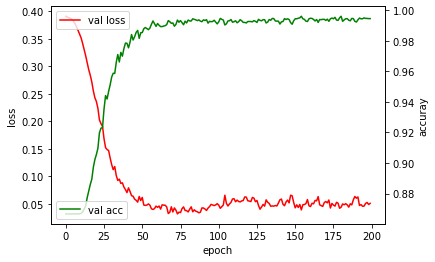

In [11]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

# loss_ax.plot(train_loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')

# acc_ax.plot(train_acc, 'b', label='train acc')
acc_ax.plot(val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [49]:
model.save('model_932.h5')

In [13]:

model = keras.models.load_model('model_0200.h5', compile=False)

In [12]:

mean_prize = [ np.mean(dataset[87:, 8]),
           np.mean(dataset[87:, 9]),
           np.mean(dataset[87:, 10]),
           np.mean(dataset[87:, 11]),
           np.mean(dataset[87:, 12])]

print(mean_prize)           

[2436889250.280846, 57166725.1386604, 1451543.1292596944, 52903.616921269095, 5000.0]


In [13]:
def calc_reward(true_numbers, true_bonus, pred_numbers):

    count = 0

    for ps in pred_numbers:
        if ps in true_numbers:
            count += 1

    if count == 6:
        return mean_prize[0], count
    elif count == 5 and true_bonus in pred_numbers:
        return mean_prize[1], count
    elif count == 5:
        return mean_prize[2], count
    elif count == 4:
        return mean_prize[3], count
    elif count == 3:
        return mean_prize[4], count

    return 0, count

In [14]:
def gen_numbers_from_probability(nums_prob):

    ball_box = []

    for n in range(45):
        ball_count = int(nums_prob[n] * 100 + 1)
        ball = np.full((ball_count), n+1) #1부터 시작
        ball_box += list(ball)

    selected_balls = []

    while True:
        
        if len(selected_balls) == 6:
            break
        
        ball_index = np.random.randint(len(ball_box), size=1)[0]
        ball = ball_box[ball_index]

        #print('{0} {1} {2}'.format(len(ball_box), ball_index, ball))

        if ball not in selected_balls:
            selected_balls.append(ball)

    return selected_balls

# def gen_numbers_from_probability(nums_prob):

#     ball_box = []
# #     print(nums_prob)
#     for n in range(7):
#         for m in range(7):
#             ball_count = int(nums_prob[n][m] * 100 + 1)

# #     for n in range(45):
# #         ball_count = int(nums_prob[n] * 100 + 1)
            
#     for n in range(45):
#         ball = np.full((ball_count), n+1) #1부터 시작
#         ball_box += list(ball)

# #     print(ball_box)
#     selected_balls = []

#     while True:
        
#         if len(selected_balls) == 6:
#             break
        
#         ball_index = np.random.randint(len(ball_box), size=1)[0]
#         ball = ball_box[ball_index]

# #         print('{0} {1} {2}'.format(len(ball_box), ball_index, ball))

#         if ball not in selected_balls:
#             selected_balls.append(ball)

#     return selected_balls

In [15]:
def gen_numbers_from_probability_2(nums_prob):

    ball_box = []

    for n in range(45):
        print(nums_prob[n], n+1)
        ball_count = int(nums_prob[n] * 100 + 1)
        ball = np.full((ball_count), n+1) #1부터 시작
        ball_box += list(ball)

    print(ball_box)
    selected_balls = []

    while True:
        
        if len(selected_balls) == 6:
            break
        
        ball_index = np.random.randint(len(ball_box), size=1)[0]
        ball = ball_box[ball_index]

        #print('{0} {1} {2}'.format(len(ball_box), ball_index, ball))

        if ball not in selected_balls:
            selected_balls.append(ball)

    print(selected_balls)
    return selected_balls

# def gen_numbers_from_probability(nums_prob):

#     ball_box = []
# #     print(nums_prob)
#     for n in range(7):
#         for m in range(7):
#             ball_count = int(nums_prob[n][m] * 100 + 1)

# #     for n in range(45):
# #         ball_count = int(nums_prob[n] * 100 + 1)
            
#     for n in range(45):
#         ball = np.full((ball_count), n+1) #1부터 시작
#         ball_box += list(ball)

# #     print(ball_box)
#     selected_balls = []

#     while True:
        
#         if len(selected_balls) == 6:
#             break
        
#         ball_index = np.random.randint(len(ball_box), size=1)[0]
#         ball = ball_box[ball_index]

# #         print('{0} {1} {2}'.format(len(ball_box), ball_index, ball))

#         if ball not in selected_balls:
#             selected_balls.append(ball)

#     return selected_balls

In [16]:
import pandas as pd
import numpy as np
import math
# from sklearn.preprocessing import StandardScaler
import os

# df = pd.DataFrame(np.random.randint(0,100,size=(100, 6)), columns=list('ABCDEF'))
stock_file_name = 'lotto_num.csv' # 아마존 주가데이터 파일
encoding = 'euc-kr' # 문자 인코딩
names = ['1','2','3', '4', '5', '6', 'SUM', 'Bonus']
raw_dataframe = pd.read_csv(stock_file_name, usecols=names, encoding=encoding) #판다스이용 csv파일 로딩
#raw_dataframe.info()

stock_file_name = 'Lotto_Full.csv' # 아마존 주가데이터 파일
encoding = 'euc-kr' # 문자 인코딩
names = ['Round', 'Date', 'One', 'One_Price', 'Two', 'Two_Price', 'Three', 'Three_Price', 'Four', 'Four_Price', 'Five', 'Five_Price', '1', '2', '3', '4', '5', '6', 'Bonus']
raw_dataframe2 = pd.read_csv(stock_file_name, usecols=names, encoding=encoding) #판다스이용 csv파일 로딩

stock_file_name = 'Total_Price.csv' # 아마존 주가데이터 파일
encoding = 'euc-kr' # 문자 인코딩
names = ['Total_Price']
raw_dataframe3 = pd.read_csv(stock_file_name, usecols=names, encoding=encoding)

In [17]:
xs = samples[-1].reshape(1, 1, 45)
print(xs)
ys_pred = model.predict_on_batch(xs)

[[[0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [18]:

random_num = gen_numbers_from_probability_2(ys_pred[0])
print(random_num)
print(ys_pred)

tf.Tensor(1.67101e-14, shape=(), dtype=float32) 1
tf.Tensor(5.685182e-12, shape=(), dtype=float32) 2
tf.Tensor(1.9373062e-12, shape=(), dtype=float32) 3
tf.Tensor(8.850556e-07, shape=(), dtype=float32) 4
tf.Tensor(1.03027595e-16, shape=(), dtype=float32) 5
tf.Tensor(0.008442261, shape=(), dtype=float32) 6
tf.Tensor(0.6213425, shape=(), dtype=float32) 7
tf.Tensor(7.7534823e-10, shape=(), dtype=float32) 8
tf.Tensor(3.47626e-10, shape=(), dtype=float32) 9
tf.Tensor(4.361878e-18, shape=(), dtype=float32) 10
tf.Tensor(2.856953e-14, shape=(), dtype=float32) 11
tf.Tensor(2.1698291e-08, shape=(), dtype=float32) 12
tf.Tensor(9.810171e-09, shape=(), dtype=float32) 13
tf.Tensor(0.5828881, shape=(), dtype=float32) 14
tf.Tensor(0.020314366, shape=(), dtype=float32) 15
tf.Tensor(1.0290074e-12, shape=(), dtype=float32) 16
tf.Tensor(2.4921987e-09, shape=(), dtype=float32) 17
tf.Tensor(9.368222e-12, shape=(), dtype=float32) 18
tf.Tensor(0.999969, shape=(), dtype=float32) 19
tf.Tensor(2.178988e-05, shap

In [19]:

print(xs)
step = 937
# print(ys_pred[0])
print(raw_dataframe.values[step])
i = 0
list_numbers = []

test = []
test_1 = []

for b in range(0,6):
    if raw_dataframe.values[step][b] < 8:
        if raw_dataframe.values[step][b] == 1:
            test.append(raw_dataframe.values[step][b]+1)
            test.append(raw_dataframe.values[step][b]+7)
        elif raw_dataframe.values[step][b] == 7:
            test.append(raw_dataframe.values[step][b]-1)
            test.append(raw_dataframe.values[step][b]+7)
        else:    
            test.append(raw_dataframe.values[step][b]-1)
            test.append(raw_dataframe.values[step][b]+1)
            test.append(raw_dataframe.values[step][b]+7)

    if 7 < raw_dataframe.values[step][b] < 15:
        if raw_dataframe.values[step][b] == 8:
            test.append(raw_dataframe.values[step][b]+1)
            test.append(raw_dataframe.values[step][b]-7)
            test.append(raw_dataframe.values[step][b]+7)
        elif raw_dataframe.values[step][b] == 14:
            test.append(raw_dataframe.values[step][b]-1)
            test.append(raw_dataframe.values[step][b]-7)
            test.append(raw_dataframe.values[step][b]+7)
            test.append(raw_dataframe.values[step][b]-7)
        else:    
            test.append(raw_dataframe.values[step][b]-1)
            test.append(raw_dataframe.values[step][b]+1)
            test.append(raw_dataframe.values[step][b]+7)
            test.append(raw_dataframe.values[step][b]-7)

    if 14 < raw_dataframe.values[step][b] < 22:
        if raw_dataframe.values[step][b] == 15:
            test.append(raw_dataframe.values[step][b]+1)
            test.append(raw_dataframe.values[step][b]-7)
            test.append(raw_dataframe.values[step][b]+7)
        elif raw_dataframe.values[step][b] == 21:
            test.append(raw_dataframe.values[step][b]-1)
            test.append(raw_dataframe.values[step][b]-7)
            test.append(raw_dataframe.values[step][b]+7)
            test.append(raw_dataframe.values[step][b]-7)
        else:    
            test.append(raw_dataframe.values[step][b]-1)
            test.append(raw_dataframe.values[step][b]+1)
            test.append(raw_dataframe.values[step][b]+7)
            test.append(raw_dataframe.values[step][b]-7)

    if 21 < raw_dataframe.values[step][b] < 29:
        if raw_dataframe.values[step][b] == 22:
            test.append(raw_dataframe.values[step][b]+1)
            test.append(raw_dataframe.values[step][b]-7)
            test.append(raw_dataframe.values[step][b]+7)
        elif raw_dataframe.values[step][b] == 28:
            test.append(raw_dataframe.values[step][b]-1)
            test.append(raw_dataframe.values[step][b]-7)
            test.append(raw_dataframe.values[step][b]+7)
            test.append(raw_dataframe.values[step][b]-7)
        else:    
            test.append(raw_dataframe.values[step][b]-1)
            test.append(raw_dataframe.values[step][b]+1)
            test.append(raw_dataframe.values[step][b]+7)
            test.append(raw_dataframe.values[step][b]-7)

    if 28 < raw_dataframe.values[step][b] < 36:
        if raw_dataframe.values[step][b] == 29:
            test.append(raw_dataframe.values[step][b]+1)
            test.append(raw_dataframe.values[step][b]-7)
            test.append(raw_dataframe.values[step][b]+7)
        elif raw_dataframe.values[step][b] == 35:
            test.append(raw_dataframe.values[step][b]-1)
            test.append(raw_dataframe.values[step][b]-7)
            test.append(raw_dataframe.values[step][b]+7)
            test.append(raw_dataframe.values[step][b]-7)
        else:    
            test.append(raw_dataframe.values[step][b]-1)
            test.append(raw_dataframe.values[step][b]+1)
            test.append(raw_dataframe.values[step][b]+7)
            test.append(raw_dataframe.values[step][b]-7)

    if 35 < raw_dataframe.values[step][b] < 43:
        if raw_dataframe.values[step][b] == 36:
            test.append(raw_dataframe.values[step][b]+1)
            test.append(raw_dataframe.values[step][b]-7)
            test.append(raw_dataframe.values[step][b]+7)
        elif raw_dataframe.values[step][b] == 42:
            test.append(raw_dataframe.values[step][b]-1)
            test.append(raw_dataframe.values[step][b]-7)
            test.append(raw_dataframe.values[step][b]+7)
            test.append(raw_dataframe.values[step][b]-7)
        else:    
            test.append(raw_dataframe.values[step][b]-1)
            test.append(raw_dataframe.values[step][b]+1)
            test.append(raw_dataframe.values[step][b]+7)
            test.append(raw_dataframe.values[step][b]-7)

    if 42 < raw_dataframe.values[step][b] < 50:
        if raw_dataframe.values[step][b] == 43:
            test.append(raw_dataframe.values[step][b]+1)
            test.append(raw_dataframe.values[step][b]-7)
        else:    
            test.append(raw_dataframe.values[step][b]-1)
            test.append(raw_dataframe.values[step][b]+1)
            test.append(raw_dataframe.values[step][b]-7)

test = list(set(test))

x = 0
y = 0
z = 0
q = 0
w = 0
X_num = [1,9,17,25,33,41,7,13,19,31,37,43]
Up_num = [2,3,4,5,6,10,11,12,18]
Down_num = [32,38,39,40,44,45]
Left_num = [24,16,23,30,8,15,22,29,36]
Right_num = [26,20,27,34,14,21,28,35,42]

for b in range(len(X_num)):
    for c in range(6):
        if raw_dataframe.values[step][c] == X_num[b]:
            x += 1

for b in range(len(Up_num)):
    for c in range(6):
        if raw_dataframe.values[step][c] == Up_num[b]:
            y += 1

for b in range(len(Down_num)):
    for c in range(6):
        if raw_dataframe.values[step][c] == Down_num[b]:
            z += 1

for b in range(len(Left_num)):
    for c in range(6):
        if raw_dataframe.values[step][c] == Left_num[b]:
            q += 1

for b in range(len(Right_num)):
    for c in range(6):
        if raw_dataframe.values[step][c] == Right_num[b]:
            w += 1
            
p_position_num = [x,y,z,q,w]
print(p_position_num)

while True:
    xs = samples[-1].reshape(1, 1, 45)
    ys_pred = model.predict_on_batch(xs)
    x = 0
    y = 0
    z = 0
    q = 0
    w = 0
    xx = 0
    yy = 0
    zz = 0
    qq = 0
    ww = 0
    random_num = []
    random_num = gen_numbers_from_probability(ys_pred[0])
    random_num = list(set(random_num))
    random_num.sort()
    x = 0
    for b in range(6):
        if random_num[b] > 45:
            x += 1

    if x > 0:
        continue;
        
    x = 0
#     previous_num = [1,6,15,36,37,38]
    
#     for b in range(6):
#         for c in range(6):
#             if random_num[b] == previous_num[c]:
#                 x += 1
                
#     if x > 1:
#         continue;
    
    x = 0
    for b in range(len(test)):
        for c in range(0,6):
            if test[b] == random_num[c]:
                x += 1

    if x > 4 or x < 1:
        continue;

    for b in range(len(X_num)):
        for c in range(6):
            if random_num[c] == X_num[b]:
                xx += 1

    for b in range(len(Up_num)):
        for c in range(6):
            if random_num[c] == Up_num[b]:
                yy += 1

    for b in range(len(Down_num)):
        for c in range(6):
            if random_num[c] == Down_num[b]:
                zz += 1

    for b in range(len(Left_num)):
        for c in range(6):
            if random_num[c] == Left_num[b]:
                qq += 1

    for b in range(len(Right_num)):
        for c in range(6):
            if random_num[c] == Right_num[b]:
                ww += 1
            
    position_num = [xx,yy,zz,qq,ww]
        
#     x = 0
#     for b in range(len(p_position_num)):
#         if p_position_num[b] == position_num[b]:
#             x += 1
            
#     if x == 6:
#         continue;
        
#     if position_num[0] > 4:
#         continue;
        
#     x = 0
#     for b in range(1,len(position_num)):
#         if position_num[b] > 2:
#             x += 1
            
#     if x > 1:
#         continue;
        
#     x = 0
#     for b in range(1,len(position_num)):
#         if position_num[b] == p_position_num[b]:
#             x += 1
            
#     if x > 3:
#         continue;
    
    x = 0
    if int(len(list_numbers)) != 0:
        for m in range(0,len(list_numbers)):
            check_same_num = 0
            for a in range(0,6):
                if list_numbers[m][a] == random_num[a]:
                    check_same_num += 1

            if check_same_num == 6:
                x += 1

    if x > 0:
        continue;
        
#     x = 0
#     for b in range(6):
#         for c in range(6):
#             if raw_dataframe.values[step][b] == random_num[c]:
#                 x += 1
                
#     if x > 2:
#         continue;
        
#     ac_num = []
#     for b in range(0,6):
#         for c in range(b+1,6):
#             ac_num.append(int(abs(random_num[b] - random_num[c])))

#     ac_num = list(set(ac_num))
#     ac_num.sort()
#     if int(len(ac_num)) - (6 - 1) < 5:
#         continue;
        
    if random_num[0] > 23:
        continue;
        
#     if int(raw_dataframe.values[step][6]) == int(sum(random_num)):
#         continue;
        
#     x = 0
#     for b in range(5):
#         if abs(random_num[b] - random_num[b+1]) == 1:
#             x += 1
            
#     if x > 2:
#         continue;
        
#     y = 0
#     for b in range(5):
#         if abs(random_num[b] - random_num[b+1]) == 2:
#             y += 1
            
#     if y > 2:
#         continue;
        
#     z = 0
#     for b in range(5):
#         if abs(random_num[b] - random_num[b+1]) == 3:
#             z += 1
            
#     if z > 2:
#         continue;
        
#     if x > 0 and y > 0 and z > 1:
#         continue;
    
#     zz = 0
    
#     for b in range(5):
#         if abs(random_num[b] - random_num[b+1]) > 29:
#             zz += 1
            
#     if zz > 0:
#         continue;
        
#     zz = 0
#     for b in range(5):
#         if 30 > abs(random_num[b] - random_num[b+1]) > 19:
#             zz += 1
            
#     if zz > 1:
#         continue;
        
#     zz = 0
#     for b in range(5):
#         if 20 > abs(random_num[b] - random_num[b+1]) > 9:
#             zz += 1
            
#     if zz > 2:
#         continue;
        
#     zz = 0
#     for b in range(6):
#         for c in range(6):
#             if b != c:
#                 if abs(random_num[b] - random_num[c]) == 10:
#                     zz += 1
    
#     if zz > 4:
#         continue;
        
#     zz = 0
#     for b in range(5):
#         if abs(random_num[b] - random_num[b+1]) == 10:
#             zz += 1
            
#     if zz > 2:
#         continue;
        
#     zz = 0
#     for b in range(6):
#         if random_num[b] == 1 or random_num[b] == 45:
#             zz += 1
            
#     if zz > 1:
#         continue;
    
#     zz = 0
    
#     x = 0
#     high_ten_num = [3,12,14,18,26,33,37,43,44]
#     for b in range(6):
#         for c in range(len(high_ten_num)):
#             if random_num[b] == high_ten_num[c]:
#                 x += 1
                
#     if x > 1 or x < 1:
#         continue;
    
#     x = 0
#     high_ten_num = [2,4,5,8,15,17,24,25,26,40]
#     for b in range(6):
#         for c in range(len(high_ten_num)):
#             if random_num[b] == high_ten_num[c]:
#                 x += 1
                
#     if x > 1 or x < 1:
#         continue;
    
#     x = 0
#     low_ten_num = [3,10,18,19,21,33,36,37,44]
#     for b in range(6):
#         for c in range(len(low_ten_num)):
#             if random_num[b] == low_ten_num[c]:
#                 x += 1
    
#     if x > 1 or x < 1:
#         continue;
    
    x = 0
    #934 4,10,20,32,38,44
#     delete_num = [1,5,6,7,8,9,12,15,16,17,18,19,22,24,25,26,28,29,34,35,36,39,40,41,42,43,45]
#     하위 15개
#     delete_num = [1,2,3,7,11,12,13,15,17,18,20,24,27,29,32,33,34,37,38,40,42,44]
#     for b in range(6):
#         for c in range(len(delete_num)):
#             if random_num[b] == delete_num[c]:
#                  x += 1
                
#     if x > 0:
#         continue;
        
    x = 0
    #934 4,10,20,32,38,44
#     exactly_num = [4,8,10,14,21,26,28,35,43,45]
#     for b in range(6):
#         for c in range(len(exactly_num)):
#             if random_num[b] == exactly_num[c]:
#                 x += 1
                
#     if x < 3:
#         continue;
    
    x = 0
    print('{0} : {1} : {2}'.format(i, random_num, sum(random_num)))
    list_numbers.append(random_num)
    i += 1
    
    if i == 100:
        break;
# print(random_num)

[[[0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
[  4   8  10  16  31  36 105   9]
[1, 2, 0, 3, 0]
0 : [17, 23, 28, 35, 37, 39] : 179
1 : [15, 18, 19, 28, 32, 43] : 155
2 : [11, 16, 17, 28, 33, 45] : 150
3 : [12, 14, 17, 19, 33, 43] : 138
4 : [2, 17, 18, 24, 41, 44] : 146
5 : [17, 19, 28, 41, 43, 44] : 192
6 : [4, 17, 23, 34, 41, 42] : 161
7 : [3, 9, 17, 20, 28, 44] : 121
8 : [3, 15, 17, 21, 34, 44] : 134
9 : [6, 14, 17, 28, 34, 41] : 140
10 : [2, 7, 15, 34, 43, 44] : 145
11 : [17, 24, 25, 28, 34, 37] : 165
12 : [3, 23, 26, 29, 34, 43] : 158
13 : [3, 17, 24, 33, 34, 41] : 152
14 : [12, 16, 17, 28, 34, 43] : 150
15 : [7, 13, 15, 17, 34, 41] : 127
16 : [9, 12, 17, 25, 38, 39] : 140
17 : [3, 33, 41, 43, 44, 45] : 209
18 : [12, 17, 21, 28, 37, 43] : 158
19 : [1, 3, 23, 28, 34, 38] : 127
20 : [3, 7, 12, 15, 34, 44] : 115
21 : [17, 24, 28, 34, 41, 44] : 188
22 : [2, 7, 14, 16, 34, 43] : 116
23 : [1

In [20]:
print('rewards check')
total_rewards = 0

for n in range(len(list_numbers)):
    reward, count = calc_reward([4,11,28,39,42,45], [9], list_numbers[n])
    print('{0} {1:15,d}'.format(count, int(reward)), n)
    total_rewards += reward

print('Total {0:15,d}'.format(int(total_rewards)))

rewards check
2               0 0
1               0 1
3           5,000 2
0               0 3
0               0 4
1               0 5
2               0 6
1               0 7
0               0 8
1               0 9
0               0 10
1               0 11
0               0 12
0               0 13
1               0 14
0               0 15
1               0 16
1               0 17
1               0 18
1               0 19
0               0 20
1               0 21
0               0 22
0               0 23
1               0 24
0               0 25
1               0 26
0               0 27
0               0 28
0               0 29
1               0 30
0               0 31
2               0 32
0               0 33
1               0 34
1               0 35
0               0 36
1               0 37
0               0 38
0               0 39
2               0 40
2               0 41
0               0 42
0               0 43
0               0 44
1               0 45
0               0 46
0        

In [228]:
print('rewards check')
total_rewards = 0

for n in range(len(list_numbers_2)):
    reward, count = calc_reward([23,27,29,31,36,45], [45], list_numbers_2[n])
    print('{0} {1:15,d}'.format(count, int(reward)), n)
    total_rewards += reward

print('Total {0:15,d}'.format(int(total_rewards)))

rewards check
0               0 0
1               0 1
2               0 2
2               0 3
1               0 4
2               0 5
2               0 6
2               0 7
1               0 8
2               0 9
2               0 10
2               0 11
1               0 12
1               0 13
1               0 14
2               0 15
1               0 16
2               0 17
1               0 18
1               0 19
3           5,000 20
1               0 21
1               0 22
2               0 23
1               0 24
2               0 25
1               0 26
2               0 27
1               0 28
1               0 29
2               0 30
1               0 31
1               0 32
1               0 33
1               0 34
2               0 35
2               0 36
1               0 37
2               0 38
1               0 39
1               0 40
1               0 41
1               0 42
1               0 43
1               0 44
1               0 45
1               0 46
2        